In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from datetime import datetime
%matplotlib inline

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
NOTEBOOK_DIR = os.getcwd()
BASE_DIR = os.path.dirname(NOTEBOOK_DIR)
DATA_DIR = os.path.join(BASE_DIR, "data")
DATA_DIR_PATH = os.path.join(DATA_DIR, "Data_cars.csv")
DATA_ZIP_DIR_PATH = os.path.join(DATA_DIR, "Data_cars.csv.zip")

In [3]:
if not os.path.exists(DATA_DIR_PATH):
    !unzip "${DATA_ZIP_DIR_PATH}"

In [4]:
data_car = pd.read_csv(DATA_DIR_PATH)

In [5]:
data_car.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."


In [6]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166695 entries, 0 to 166694
Data columns (total 9 columns):
Price          166695 non-null float64
Make           166695 non-null object
Model          166695 non-null object
Model_year     166695 non-null int64
Mileage        166695 non-null object
Fuel           166695 non-null object
Gearbox        166695 non-null object
Online         166695 non-null object
Description    166695 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 11.4+ MB


In [7]:
def online_clean(df):
    datetime_format = "%d/%m/%Y à %Hh%M"
    df.Online = [datetime.strptime(d, datetime_format) for d in df.Online.values]
    return df

def mileage_clean(df):
    df.Mileage = [float(m.split(' ')[0]) for m in df.Mileage.values]
    return df

def descriptions_clean(df):
    regex_pattern = r"modele:\s*(?P<modele>.*?(?=,)),\sversion:\s*(?P<version>.*?(?=,)),\spuissance_fiscale:\s*(?P<puissance_fiscale>.*?(?=,)),\sportes:\s*(?P<portes>.*?(?=,)),\soptions:\s*(?P<Descriptions>.*?(?=,)),\scouleur:\s(?P<couleur>.*$)"
    version = []
    spuissance_fiscale = []
    portes = []
    options = []
    couleur = []
    for i in range(df.shape[0]):
        match = re.search(regex_pattern, df.Description[i])
        version.append(match.group(2))
        spuissance_fiscale.append(match.group(3))
        portes.append(match.group(4))
        options.append(match.group(5))
        couleur.append(match.group(6))
    df["version"] = list(map(str.lower, version))
    df["spuissance_fiscale"] = spuissance_fiscale
    df["portes"] = portes
    df["options"] = options
    df["couleur"] = list(map(str.lower, couleur))
    del df["Description"]
    return df

def preprocessing(data, preprocessors=None):
    df = data.copy(deep=True)
    if preprocessors is not None:
        for preprocessor in preprocessors:
            df = preprocessor(df)
        return df
    else:
        return df

In [21]:
data_car_preprocessed = preprocessing(data_car, [online_clean, mileage_clean, descriptions_clean])

In [9]:
data_car_preprocessed.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,version,spuissance_fiscale,portes,options,couleur
0,11220.0,PEUGEOT,308,2014,94341.0,Diesel,mécanique,2018-07-06 03:47:00,1.6 hdi fap 92ch business 5p,4,5.0,banquette arrière 3 places;volant cuir;cache b...,blanc banquise
1,57526.0,BMW,X6,2015,39051.0,Diesel,automatique,2018-04-03 16:41:00,(f16) xdrive30d 258 m sport bva8,16,5.0,triangle de presignalisation et trousse de pre...,carbonschwarz metallise
2,80379.0,AUDI,RS6,2014,75381.0,Essence,automatique,2018-07-30 01:55:00,iii avant 4.0 tfsi 560 quattro tiptronic,47,5.0,banquette arrière 3 places;écran tactile;témoi...,noir panthere cristal
3,2830.0,FORD,KA,2007,92282.0,Essence,mécanique,2018-07-09 14:12:00,1.3 70 fun,5,3.0,direction assistée;jantes alu;rétroviseurs éle...,jaune
4,12925.0,FIAT,TIPO,2018,10.0,Essence,mécanique,2018-05-19 03:52:00,ii sw 1.4 95 pop,5,5.0,Volant alu & cuir;Bluetooth inclut musique en ...,blanc verni


In [10]:
data_car_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166695 entries, 0 to 166694
Data columns (total 13 columns):
Price                 166695 non-null float64
Make                  166695 non-null object
Model                 166695 non-null object
Model_year            166695 non-null int64
Mileage               166695 non-null float64
Fuel                  166695 non-null object
Gearbox               166695 non-null object
Online                166695 non-null datetime64[ns]
version               166695 non-null object
spuissance_fiscale    166695 non-null object
portes                166695 non-null object
options               166695 non-null object
couleur               166695 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 16.5+ MB


In [11]:
data_car_preprocessed.Online.describe()

count                  166695
unique                 123336
top       2018-07-07 17:12:00
freq                        7
first     2018-01-03 02:34:00
last      2018-10-29 10:45:00
Name: Online, dtype: object

## Duplicated offers

- In the case that poster modifies used car's price after posted date to sold this car.
- All car's information will be same out of Online date and car price
- So we try to find all duplicated row followed car caracteristics and maintain just the price of the last online date

In [29]:
# get all duplicated row and check if it sort by time and see how's price evoluate
allDuplicateRowsDF = data_car_preprocessed[data_car_preprocessed.sort_values(by="Online").duplicated(fix_col, keep=False)]
allDuplicateRowsDF = list(allDuplicateRowsDF.index)
table = pd.pivot_table(data_car_preprocessed.iloc[allDuplicateRowsDF,:].reset_index().sort_values(by="Online"), values=["Online", "Price", "index"], index=fix_col, aggfunc=list)
table

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Online  \
Make       Model             Model_year Mileage  Fuel    Gearbox     version                                            spuissance_fiscale portes options                                            couleur                                                                   
ABARTH     500               2018       10.0     Essence automatique (2) c 1.4 turbo t-jet 160 595c pista bva           9                  2.0    écran tactile;palettes au volant;radar de recul... gris record                  [2018-05-06 16:20:00, 2018-06-20 10:12:00]   
                                                         mécanique   (2) c 1.4 turbo t-jet 160 595c pista               9                  2.0    écran tactile;radar de recul;volant cuir;prises... noir métal                   [2018-08-13 10:35:00, 2018-08-26 13:16:00]   
ALFA ROMEO GIULIA            2017       1.0      Diesel  automatique ii 2.2 180 super at8                               9                  4.0    GPS;prise audio USB;régulateur de vitesse;proje... blanc                        [2018-04-04 17:33:00, 2018-05-23 09:38:00]   
                                        10.0     Diesel  automatique ii 2.2 150 super at8                               7                  4.0    prise audio USB;régulateur de vitesse;projecteu... blanc                        [2018-03-03 01:25:00, 2018-06-14 22:50:00]   
                                                                     ii 2.2 180 super at8                               9                  4.0    prises audio auxiliaires;GPS;prise audio USB;ré... blanc                 [2018-04-25 08:13:00, 2018-06-03 08:52:00, 201...   
                                        19.0     Diesel  automatique ii 2.2 180 super at8                               9                  4.0    banquette arrière 3 places;témoin de bouclage d... blanc                        [2018-02-08 00:33:00, 2018-04-30 12:56:00]   
                                        20.0     Diesel  automatique ii 2.2 180 super at8                               9                  4.0    banquette arrière 3 places;témoin de bouclage d... blanc                 [2018-02-10 07:33:00, 2018-02-23 17:45:00, 201...   
                             2018       10.0     Diesel  automatique ii 2.2 180 q4 lusso at8                            9                  4.0    banquette arrière 3 places;palettes changement ... gris lipari                  [2018-07-06 01:38:00, 2018-09-08 04:14:00]   
                                                                     ii 2.2 180 super at8                               9                  4.0    référence 521283;jantes alu 17&quot;régulateur ... blanc                 [2018-05-22 01:39:00, 2018-06-02 03:27:00, 201...   
           GIULIETTA         2018       1.0      Essence automatique iii (3) 1.4 tb multiair 170 s/s super alfa tct     9                  5.0    écran tactile;palettes au volant;peinture paste... blanc                        [2018-10-07 05:15:00, 2018-10-08 09:22:00]   
                                        10.0     Essence mécanique   serie 2 1.4 tb multiair 150 c                      8                  5.0    5 places;pack veloce 18&quot                       blanc                        [2018-06-20 02:49:00, 2018-08-01 17:46:00]   
           MITO              2018       10.0     Essence automatique 1.4 tb multiair 140 s/s imola tct                  7                  3.0    écran tactile;volant cuir;prises audio auxiliai... blanc alfa                   [2018-05-20 18:47:00, 2018-08-07 10:22:00]   
                                                         mécanique   1.4 mpi 78ch s/s edizione                          5                  3.0    écran tactile;prises audio auxiliaires;directio... rouge                        [2018-08-02 22:24:00, 2018-08-19 11:23:00]   
           STELVIO           2018       1.0      Diesel  automatique 2.2 diesel 210 q4 sport edition at8                11                 5.0    sièges électriques;pack sport;projec

In [18]:
# verify some data
data_car_preprocessed.iloc[[7272, 35351, 79192, 131758, 138531],:].sort_values(by=["Online", "Price"])

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,version,spuissance_fiscale,portes,options,couleur
7272,33719.0,ALFA ROMEO,GIULIA,2017,10.0,Diesel,automatique,2018-04-25 08:13:00,ii 2.2 180 super at8,9,4.0,prises audio auxiliaires;GPS;prise audio USB;r...,blanc
131758,34042.0,ALFA ROMEO,GIULIA,2017,10.0,Diesel,automatique,2018-06-03 08:52:00,ii 2.2 180 super at8,9,4.0,prises audio auxiliaires;GPS;prise audio USB;r...,blanc
138531,33130.0,ALFA ROMEO,GIULIA,2017,10.0,Diesel,automatique,2018-07-22 02:38:00,ii 2.2 180 super at8,9,4.0,prises audio auxiliaires;GPS;prise audio USB;r...,blanc
35351,33343.0,ALFA ROMEO,GIULIA,2017,10.0,Diesel,automatique,2018-09-16 12:10:00,ii 2.2 180 super at8,9,4.0,prises audio auxiliaires;GPS;prise audio USB;r...,blanc
79192,32595.0,ALFA ROMEO,GIULIA,2017,10.0,Diesel,automatique,2018-09-21 10:35:00,ii 2.2 180 super at8,9,4.0,prises audio auxiliaires;GPS;prise audio USB;r...,blanc


In [22]:
# find dupplicated
fix_col = list(data_car_preprocessed.columns)
fix_col.remove("Online")
fix_col.remove("Price")
duplicateRowsDF = data_car_preprocessed[data_car_preprocessed.sort_values(by="Online").duplicated(fix_col, keep='last')]
duplicateRowsDF.head()

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,version,spuissance_fiscale,portes,options,couleur
16,14384.0,PEUGEOT,208,2018,10.0,Essence,mécanique,2018-05-12 06:19:00,(2) 1.2 puretech 82 allure 5p,4,5.0,volant cuir;régulateur limiteur de vitesse;rou...,gris aluminium
22,25407.0,RENAULT,MEGANE,2018,20.0,Essence,automatique,2018-08-26 21:30:00,1.6 tce 205 edc gt bose tpano,11,5.0,version 1.6 tce 205 edc gt bose tpano;régulate...,bleu
66,15912.0,FIAT,500,2018,10.0,Essence,mécanique,2018-03-19 18:39:00,ii (2) 1.2 8v 69 anniversario,4,3.0,écran tactile;direction assistée;airbags latér...,gris
99,19808.0,CITROEN,C3 AIRCROSS,2018,10.0,Essence,mécanique,2018-01-13 19:47:00,1.2 puretech 110 s&s feel,6,5.0,écran tactile;poignées de portes couleur carro...,blanc
108,28958.0,HYUNDAI,TUCSON,2018,10.0,Diesel,automatique,2018-06-11 14:21:00,1.7 crdi 141 dct7 creative,0,5.0,volant cuir;prises audio auxiliaires;banquette...,noir metal


- there are 9490 duplicated row
- next step, we need to exclude these rows from our original data

In [23]:
duplicateRowsDF.shape

(6420, 13)

In [14]:
len(duplicateRowsDF.index)

6420

In [15]:
# all index duplicated without the last row (sort by date time)
row_duplicated = list(duplicateRowsDF.index)
row_rested = list(set(data_car_preprocessed.index) - set(row_duplicated))

In [16]:
# as we mentionne above, we'll get the last deal price on marketplace
data_car_preprocessed_non_duplicate = data_car_preprocessed.loc[row_rested, :]
data_car_preprocessed_non_duplicate.shape

(160275, 13)

In [30]:
data_car_preprocessed_non_duplicate.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,version,spuissance_fiscale,portes,options,couleur
0,11220.0,PEUGEOT,308,2014,94341.0,Diesel,mécanique,2018-07-06 03:47:00,1.6 hdi fap 92ch business 5p,4,5.0,banquette arrière 3 places;volant cuir;cache b...,blanc banquise
1,57526.0,BMW,X6,2015,39051.0,Diesel,automatique,2018-04-03 16:41:00,(f16) xdrive30d 258 m sport bva8,16,5.0,triangle de presignalisation et trousse de pre...,carbonschwarz metallise
2,80379.0,AUDI,RS6,2014,75381.0,Essence,automatique,2018-07-30 01:55:00,iii avant 4.0 tfsi 560 quattro tiptronic,47,5.0,banquette arrière 3 places;écran tactile;témoi...,noir panthere cristal
3,2830.0,FORD,KA,2007,92282.0,Essence,mécanique,2018-07-09 14:12:00,1.3 70 fun,5,3.0,direction assistée;jantes alu;rétroviseurs éle...,jaune
4,12925.0,FIAT,TIPO,2018,10.0,Essence,mécanique,2018-05-19 03:52:00,ii sw 1.4 95 pop,5,5.0,Volant alu & cuir;Bluetooth inclut musique en ...,blanc verni


In [31]:
# verify some last deal price exists on data
data_car_preprocessed_non_duplicate.loc[79192, :]

Price                                                             32595
Make                                                         ALFA ROMEO
Model                                                            GIULIA
Model_year                                                         2017
Mileage                                                              10
Fuel                                                             Diesel
Gearbox                                                     automatique
Online                                              2018-09-21 10:35:00
version                                            ii 2.2 180 super at8
spuissance_fiscale                                                    9
portes                                                              4.0
options               prises audio auxiliaires;GPS;prise audio USB;r...
couleur                                                           blanc
Name: 79192, dtype: object

### Question:
1. pour les offres dupplicable: on sait pas le prix final est le prix vendu ou non?
2. ignore les évolutions du prix entre la création et le vend?
3. l'objectif est l'estimation du prix sur le marché, non pas le prix meilleur pour le vendre

## Data Visualization

import datetime
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
date_start = datetime.datetime( 2018, 1, 3)
date_end = datetime.datetime( 2018, 10, 29)
delta_date = datetime.timedelta(days=1)
dates = drange(date_start, date_end, delta_date)

ys = np.arange( len(dates) )

fig, ax = plt.subplots(figsize=(16,8))


ax.plot_date(dates, ys*ys)

ax.xaxis.set_major_formatter( DateFormatter('%Y-%m') )

plt.show()

fig, ax = plt.subplots(figsize=(16,8))

ax.plot_date(data_car_preprocessed_non_duplicate.index, data_car_preprocessed_non_duplicate.Price)

ax.xaxis.set_major_formatter( DateFormatter('%Y-%m') )

plt.show()

## Price distribution by group

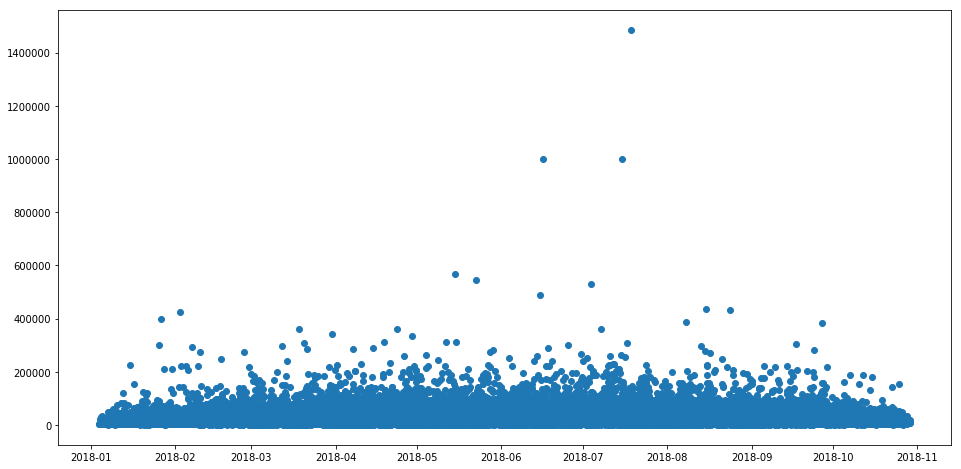

In [75]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=(16,8))

ax.plot_date(data_car_preprocessed_non_duplicate.Online, data_car_preprocessed_non_duplicate.Price)

ax.xaxis.set_major_formatter( DateFormatter('%Y-%m') )

plt.show()

In [79]:
# number of used car have high price, it's mean ulterieur 200000 euro
len(data_car_preprocessed_non_duplicate[data_car_preprocessed_non_duplicate.Price > 200000])

115

In [87]:
bins_price = np.linspace(min(data_car_preprocessed_non_duplicate.Price), \
                         200000, \
                         4)
print(bins_price)
bins_price = list(bins_price)
# add a super high price
bins_price.append(max(data_car_preprocessed_non_duplicate.Price))

bins_price

[1.00000000e+00 6.66673333e+04 1.33333667e+05 2.00000000e+05]


[1.0, 66667.33333333333, 133333.66666666666, 200000.0, 1486500.0]

In [99]:
group_names = ["Low", "Medium", "High", "Super High"]

data_car_preprocessed_non_duplicate["price_binned"] = pd.cut(data_car_preprocessed_non_duplicate.Price, \
                                                            bins_price, \
                                                            labels=group_names, \
                                                            include_lowest=True)



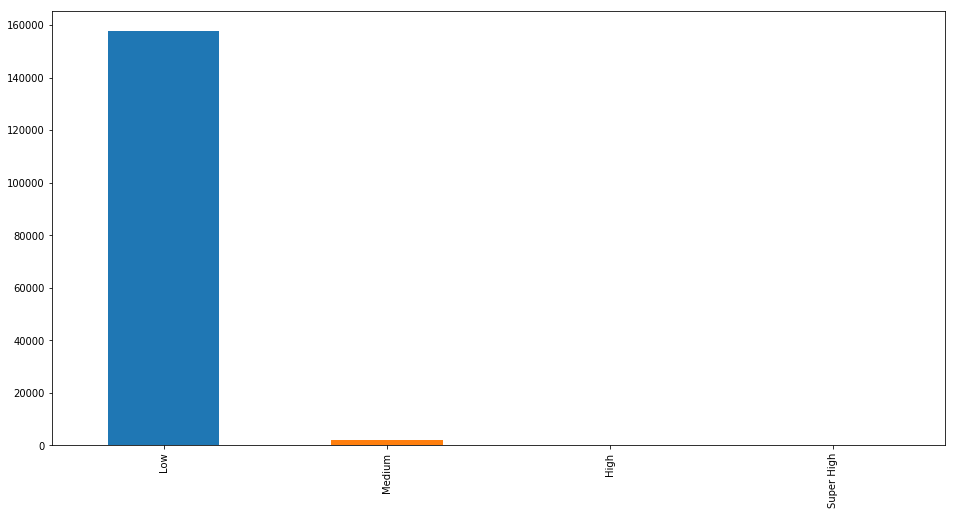

In [102]:
data_car_preprocessed_non_duplicate.price_binned.value_counts().plot(kind='bar', figsize=(16,8))

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


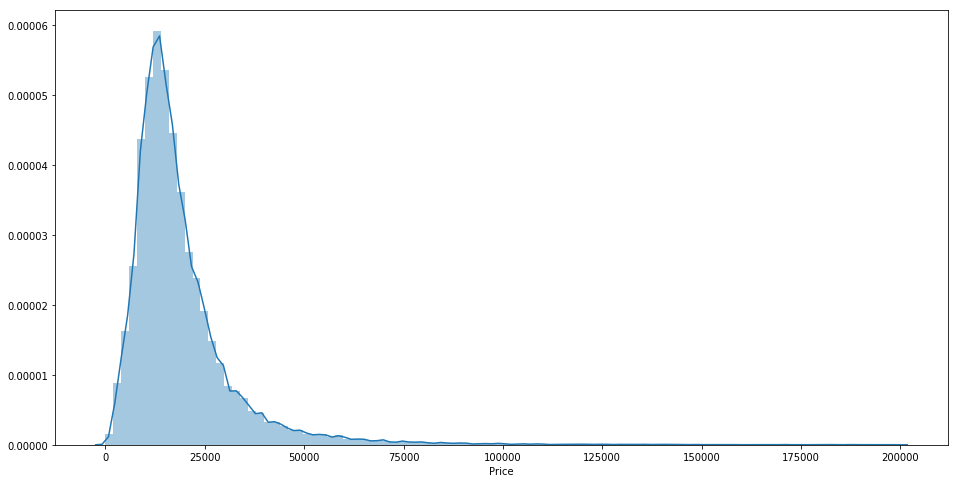

In [118]:
#plt.hist(data_car_preprocessed_non_duplicate.price_binned)
f, axes = plt.subplots(figsize=(16, 8), sharex=True)
#sns.distplot(data_car_preprocessed_non_duplicate.Price, bins=50)
sns.distplot(data_car_preprocessed_non_duplicate[data_car_preprocessed_non_duplicate.Price < 200000.0].Price, bins=100)

In [113]:
# expensive used car
data_car_preprocessed_non_duplicate["log_price"] = np.log(data_car_preprocessed_non_duplicate.Price)

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


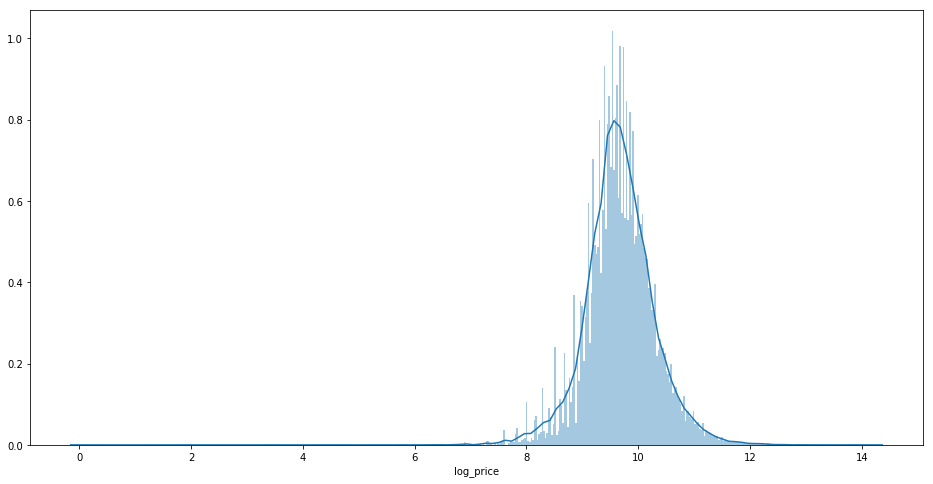

In [116]:
f, axes = plt.subplots(figsize=(16, 8), sharex=True)
sns.distplot(data_car_preprocessed_non_duplicate.log_price, bins=500, norm_hist=True)

## <font color='Green'>Visualization price used car with</font>

### 1. <font color='blue'>Make</font>

In [40]:
data_car_preprocessed_non_duplicate.Make.nunique()

92

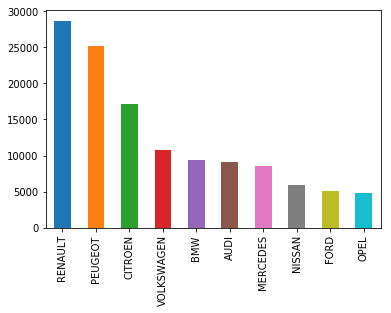

In [165]:
data_car_preprocessed_non_duplicate["Make"].value_counts()[:10].plot(kind='bar')

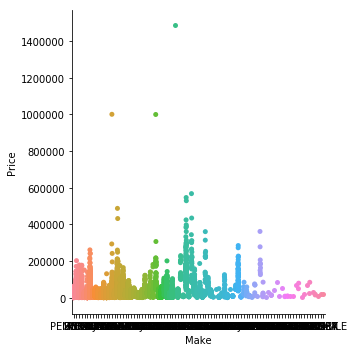

In [39]:
sns.catplot(x="Make", y="Price", data=data_car_preprocessed_non_duplicate);

In [44]:
data_car_preprocessed_non_duplicate.groupby(by="Make")["Price"].agg(lambda x: sum(x)/len(x)).sort_values().tail()

Make
ROLLS ROYCE    1.442489e+05
FERRARI        1.619987e+05
MCLAREN        1.973113e+05
LAMBORGHINI    1.980358e+05
BUGATTI        1.486500e+06
Name: Price, dtype: float64

In [48]:
data_car_preprocessed_non_duplicate[data_car_preprocessed_non_duplicate.Make == "BMW-ALPINA"]

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,version,spuissance_fiscale,portes,options,couleur
3068,48135.0,BMW-ALPINA,B3 S,2012,29371.0,Essence,automatique,2018-04-13 00:41:00,coupe bi-turbo 400 switch-tronic,29,2.0,GPS 16/9;radar de recul;rétroviseurs électriqu...,gris


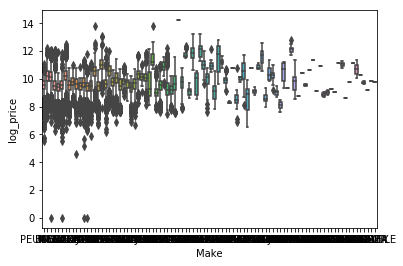

In [119]:
sns.boxplot(x ='Make', y ='log_price', data = data_car_preprocessed_non_duplicate) 

Text(0.5, 1.0, 'Scatterplot of Make vs Price')

Text(0.5, 0, 'Make')

Text(0, 0.5, 'Price')

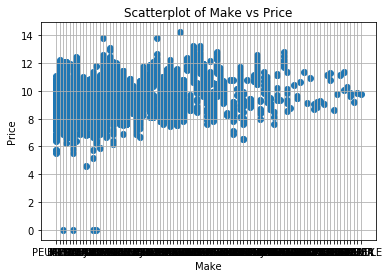

In [120]:
plt.scatter(data_car_preprocessed_non_duplicate['Make'], data_car_preprocessed_non_duplicate['log_price']) 
plt.title('Scatterplot of Make vs Price') 
plt.xlabel('Make') 
plt.ylabel('Price') 
plt.grid() 
plt.show() 

In [140]:
data_car_preprocessed_non_duplicate["Make"].values

array(['PEUGEOT', 'BMW', 'AUDI', ..., 'FORD', 'SKODA', 'RENAULT'],
      dtype=object)

In [141]:
import scipy as sp
# analyst anova make vs price (Analyst of Variance)
data_annova = data_car_preprocessed_non_duplicate[["Make", "log_price"]]
grouped_annova = data_annova.groupby(by="Make")
annova_results_l = sp.stats.f_oneway(grouped_annova.get_group("PEUGEOT")["log_price"], \
                                  grouped_annova.get_group("RENAULT")["log_price"])
print(annova_results_l)

F_onewayResult(statistic=23.98395028063666, pvalue=9.742306476251108e-07)


### Question:
1. Comment on gere les voiture peu apparait dans la data?

### 2. <font color='blue'> Make - Model - Model year</font>

In [123]:
grp_car = data_car_preprocessed_non_duplicate.groupby(by=["Make", "Model", "Model_year"], as_index=False)["log_price"].agg(lambda x: sum(x)/len(x))
grp_car

,Make,Model,Model_year,log_price
0,ABARTH,124,1900,10.630505
1,ABARTH,124,2017,10.430477
2,ABARTH,124,2018,10.481080
3,ABARTH,500,2008,9.203316
4,ABARTH,500,2009,9.276675
5,ABARTH,500,2010,9.220291
6,ABARTH,500,2011,9.620025
7,ABARTH,500,2012,9.432564
8,ABARTH,500,2013,9.545079
9,ABARTH,500,2014,9.657366


make = data_car_preprocessed_non_duplicate["Make"].values
model_year = data_car_preprocessed_non_duplicate["Model_year"].values
model = data_car_preprocessed_non_duplicate["Model"].values
pd.crosstab(make, [model, model_year])

In [137]:
grp_pivot = pd.crosstab(grp_car["Make"], [grp_car["Model"], grp_car["Model_year"]], grp_car["log_price"], aggfunc=np.mean)
grp_pivot

Model              1000                1007                                \
Model_year         1980      1997      2005      2006      2007      2008   
Make                                                                        
ABARTH              NaN       NaN       NaN       NaN       NaN       NaN   
AC                  NaN       NaN       NaN       NaN       NaN       NaN   
AIXAM               NaN       NaN       NaN       NaN       NaN       NaN   
ALFA ROMEO          NaN       NaN       NaN       NaN       NaN       NaN   
ALPINA              NaN       NaN       NaN       NaN       NaN       NaN   
ALPINE              NaN       NaN       NaN       NaN       NaN       NaN   
ASTON MARTIN        NaN       NaN       NaN       NaN       NaN       NaN   
AUDI                NaN       NaN       NaN       NaN       NaN       NaN   
AUSTIN         9.099856  9.358674       NaN       NaN       NaN       NaN   
AUSTIN HEALEY       NaN       NaN       NaN       NaN       NaN       NaN   
AUTOBIANCHI         NaN       NaN       NaN       NaN       NaN       NaN   
BELLIER             NaN       NaN       NaN       NaN       NaN       NaN   
BENTLEY             NaN       NaN       NaN       NaN       NaN       NaN   
BMW                 NaN       NaN       NaN       NaN       NaN       NaN   
BMW-ALPINA          NaN       NaN       NaN       NaN       NaN       NaN   
BOLLORE             NaN       NaN       NaN       NaN       NaN       NaN   
BUGATTI             NaN       NaN       NaN       NaN       NaN       NaN   
BURBY S             NaN       NaN       NaN       NaN       NaN       NaN   
CADILLAC            NaN       NaN       NaN       NaN       NaN       NaN   
CATERHAM            NaN       NaN       NaN       NaN       NaN       NaN   
CHATENET            NaN       NaN       NaN       NaN       NaN       NaN   
CHEVROLET           NaN       NaN       NaN       NaN       NaN       NaN   
CHRYSLER            NaN       NaN       NaN       NaN       NaN       NaN   
CITROEN             NaN       NaN       NaN       NaN       NaN       NaN   
DACIA               NaN       NaN       NaN       NaN       NaN       NaN   
DAEWOO              NaN       NaN       NaN       NaN       NaN       NaN   
DAIHATSU            NaN       NaN       NaN       NaN       NaN       NaN   
DANGEL              NaN       NaN       NaN       NaN       NaN       NaN   
DODGE               NaN       NaN       NaN       NaN       NaN       NaN   
DONKERVOORT         NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
MINI                NaN       NaN       NaN       NaN       NaN       NaN   
MITSUBISHI          NaN       NaN       NaN       NaN       NaN       NaN   
MORGAN              NaN       NaN       NaN       NaN       NaN       NaN   
MPM MOTORS          NaN       NaN       NaN       NaN       NaN       NaN   
NISSAN              NaN       NaN       NaN       NaN       NaN       NaN   
OLDSMOBILE          NaN       NaN       NaN       NaN       NaN       NaN   
OPEL                NaN       NaN       NaN       NaN       NaN       NaN   
PACKARD             NaN       NaN       NaN       NaN       NaN       NaN   
PEUGEOT             NaN       NaN  8.302912  8.252465  8.315371  8.374349   
PORSCHE             NaN       NaN       NaN       NaN       NaN       NaN   
RENAULT             NaN       NaN       NaN       NaN       NaN       NaN   
RILEY               NaN       NaN       NaN       NaN       NaN       NaN   
ROLLS ROYCE         NaN       NaN       NaN       NaN       NaN       NaN   
ROVER               NaN       NaN       NaN       NaN       NaN       NaN   
SAAB                NaN       NaN       NaN       NaN       NaN       NaN   
SEAT                NaN       NaN       NaN       NaN       NaN       NaN   
SECMA               NaN       NaN       NaN       NaN       NaN       NaN   
SHELBY              NaN       NaN       NaN       NaN       NaN       NaN

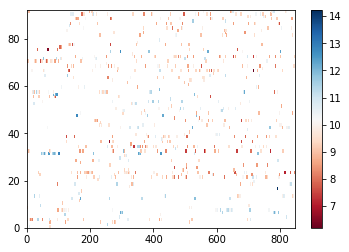

In [136]:
plt.pcolor(grp_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

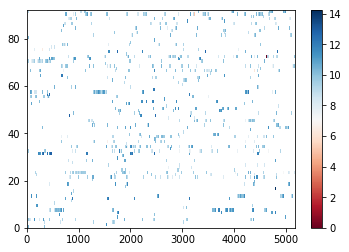

In [138]:
plt.pcolor(grp_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

### 3. <font color='blue'> Mileage </font>

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 1489531.2928301105)

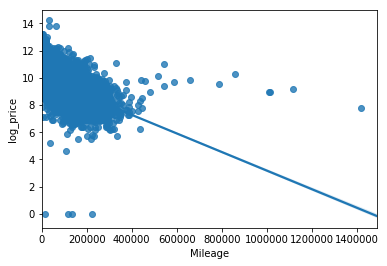

In [148]:
sns.regplot(x ='Mileage', y ='log_price', data = data_car_preprocessed_non_duplicate) 
plt.xlim(0,)

In [152]:
data_car_preprocessed_non_duplicate[data_car_preprocessed_non_duplicate.Mileage > 400000].Make.unique()

array(['CITROEN', 'RENAULT', 'NISSAN', 'AUDI', 'VOLVO', 'MERCEDES',
       'PEUGEOT', 'BMW', 'VOLKSWAGEN'], dtype=object)

/Users/nguyenkhacbaoanh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


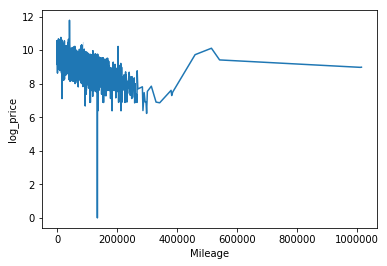

In [155]:
sns.lineplot(x ='Mileage', y ='log_price', data = data_car_preprocessed_non_duplicate[data_car_preprocessed_non_duplicate.Make == 'CITROEN'])

### 4. <font color='blue'> Fuel </font>

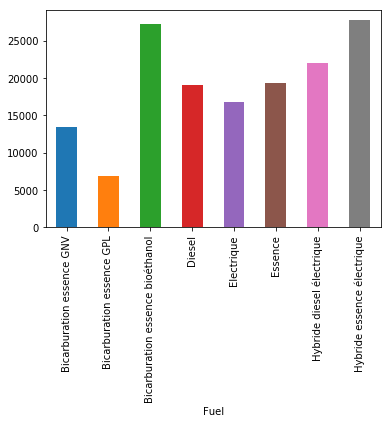

In [157]:
data_car_preprocessed_non_duplicate.groupby(by="Fuel")["Price"].agg(np.mean).plot(kind='bar')

### 5. <font color='blue'> Gearbox </font>

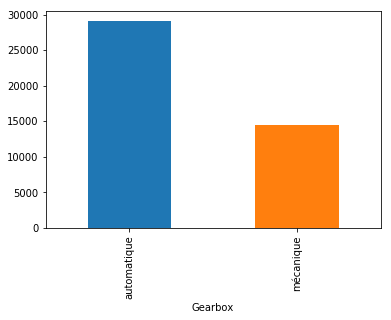

In [158]:
data_car_preprocessed_non_duplicate.groupby(by="Gearbox")["Price"].agg(np.mean).plot(kind='bar')

## Test Hypothèse:
1. Correlation entre Price et Mileage
2. Price vs 

In [170]:
from scipy.stats import pearsonr, levene, ttest_ind
corr_pearsonr, p_value = pearsonr(data_car_preprocessed_non_duplicate.Price, \
                                  data_car_preprocessed_non_duplicate.Mileage)
print("pearson correlation: {:.2f} with P value: {:.2f}".format(corr_pearsonr, p_value))
stats_results, p_value = levene(data_car_preprocessed_non_duplicate.Price, \
                                  data_car_preprocessed_non_duplicate.Mileage)
print("Checking homogeneity of variance: statistic: {:.2f} with P value: {:.2f}".format(stats_results, p_value))

pearson correlation: -0.30 with P value: 0.00
Checking homogeneity of variance: statistic: 85597.67 with P value: 0.00


Avec Pearson test:
    - price and lieage est faible corrélé (-0.3) avec p value est 0. Avec fiabitité 95%, Price et Lieage n'est pas corrélé

Avec Levene test: (valeur du statistic est plus grand et p value est plus petit, on refuse H0, cad, les deux variable n'est pas corrélé
    - Test variance a le statistic est très grand et P value est 0 => Passer une autre test

In [173]:
stats_results, p_value = ttest_ind(data_car_preprocessed_non_duplicate.Price, \
                                  data_car_preprocessed_non_duplicate.Mileage)
print("the result of the Welch’s test: statistic: {:.2f} with P value: {:.2f}".format(stats_results, p_value))

the result of the Welch’s test: statistic: -404.07 with P value: 0.00


## Test normality

Comme on a analysé sur le prix, le histogram du prix ne semble pas distribution normal mais, si on fait log sur le prix, il resemble maintenant distribution normale. Mais il faut vérifier

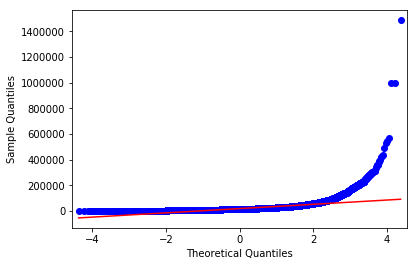

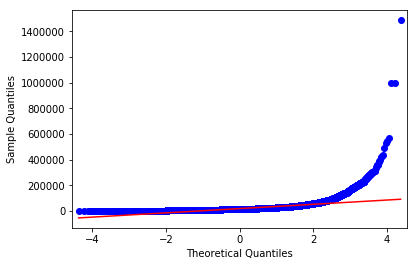

In [177]:
qqplot(data_car_preprocessed_non_duplicate.Price, line='s')

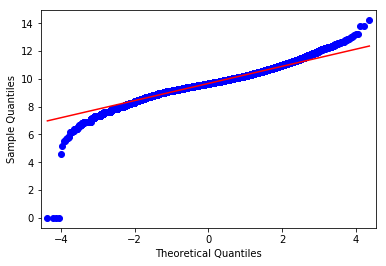

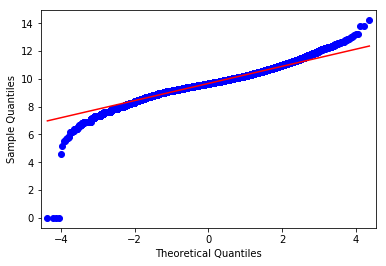

In [183]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data_car_preprocessed_non_duplicate.log_price, line='s')
#plt.show()

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Lieage')

Text(0.5, 1.0, 'Price vs Mileage')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Lieage')

Text(0.5, 1.0, 'Log Price vs Mileage')

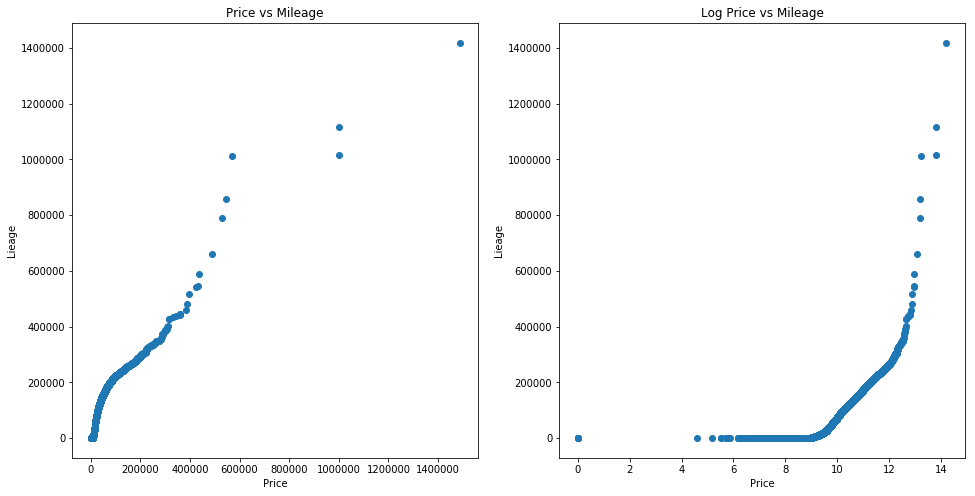

In [192]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax = ax.flatten()
ax[0].scatter(np.sort(data_car_preprocessed_non_duplicate.Price), np.sort(data_car_preprocessed_non_duplicate.Mileage))
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Lieage')
ax[0].set_title("Price vs Mileage")
ax[1].scatter(np.sort(data_car_preprocessed_non_duplicate.log_price), np.sort(data_car_preprocessed_non_duplicate.Mileage))
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Lieage')
ax[1].set_title("Log Price vs Mileage")
plt.show()
plt.close()

In [194]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit_transform(data_car_preprocessed_non_duplicate.Make)

array([70, 13,  7, ..., 34, 81, 72])

In [196]:
categorical_v = ["Make", "Model", "Model_year", "Fuel", "Gearbox", "version", "couleur"]
data_car_preprocessed_non_duplicate[categorical_v] = data_car_preprocessed_non_duplicate[categorical_v].apply(LabelEncoder().fit_transform)

In [197]:
data_car_preprocessed_non_duplicate.head(10)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,version,spuissance_fiscale,portes,options,couleur,price_binned,log_price
0,11220.0,70,46,66,94341.0,3,1,2018-07-06 03:47:00,10231,4,5.0,banquette arrière 3 places;volant cuir;cache b...,881,Low,9.325453
1,57526.0,13,814,67,39051.0,3,0,2018-04-03 16:41:00,4407,16,5.0,triangle de presignalisation et trousse de pre...,2194,Low,10.959992
2,80379.0,7,635,66,75381.0,5,0,2018-07-30 01:55:00,25379,47,5.0,banquette arrière 3 places;écran tactile;témoi...,4957,Medium,11.294508
3,2830.0,34,462,59,92282.0,5,1,2018-07-09 14:12:00,7044,5,3.0,direction assistée;jantes alu;rétroviseurs éle...,4089,Low,7.948032
4,12925.0,32,739,70,10.0,5,1,2018-05-19 03:52:00,21956,5,5.0,Volant alu & cuir;Bluetooth inclut musique en ...,1258,Low,9.466919
5,27956.0,13,811,64,95623.0,3,0,2018-03-14 04:24:00,4866,20,5.0,vitrage calorifuge;triangle de presignalisatio...,6130,Low,10.238387
6,16888.0,7,114,65,49018.0,3,1,2018-04-16 21:35:00,18545,7,5.0,"""anti démarrage;radar de recul;prises audio au...",3004,Low,9.734359
7,18188.0,72,507,69,9795.0,3,0,2018-04-29 12:44:00,28053,5,5.0,régulateur limiteur de vitesse;carte main libr...,2650,Low,9.808517
8,10594.0,34,186,64,126670.0,3,1,2018-06-22 05:11:00,20044,6,5.0,,2021,Low,9.268043
9,69131.0,57,240,67,39439.0,5,0,2018-03-08 17:35:00,5807,40,4.0,régulateur limiteur de vitesse;affichage tête ...,4607,Medium,11.143759
